In [1]:
import tensorflow as tf

import os
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pickle

import math
import cv2
import numpy as np
from numpy import cos as cos
from numpy import sin as sin
from numpy import sqrt as sqrt
from numpy import arctan2 as arctan2
import os
import datetime
import time

import sys
from functions import *
from tf_functions import *
from zernike_functions import *

In [2]:
# init_param

    ### N: pix num, p: pix size[m]
N = 2160
p = 3.74e-6

### l_ambda: wavelength
l_ambda = 520e-9

### z: distance from holo to img
z = 0.05

In [3]:
in_dir = '../input/'
out_dir = '../output/'
dt_now = datetime.datetime.now()

In [4]:
# Input Image
input_img = cv2.imread(in_dir + 'baboon_gray.png', cv2.IMREAD_GRAYSCALE) # ターゲットとの画像を読み込む
point_image = np.full((2160,2160),0)
point_image[1080][1080] = 255
input_img = point_image
cv2.imwrite(out_dir + 'check.png', input_img) #読み込みの確認
size = (N,N)
input_img = cv2.resize(input_img, size)
phase = np.random.rand() # np.random()とかでランダムな位相分布を作る
phase_exp = np.exp(1j*phase)
input_plane =  input_img * phase_exp

In [5]:
# Back-Propagation from Image Plane to SLM Plane
input_plane_add = ImageProcess.add_zero_padding(input_plane)
N = input_plane_add.shape[0]
slm_plane = CGH.angular_spectrum(input_plane_add, N, l_ambda, z*-1, p) #ホロ面への逆伝播を計算
slm_plane = ImageProcess.remove_zero_padding(slm_plane)
N = slm_plane.shape[0]

phase_slm = CGH.phase_norm( CGH.phase(slm_plane) )

cv2.imwrite(out_dir + 'simple_holo_baboon.png', phase_slm)

True

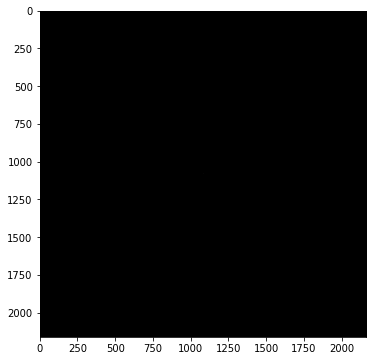

In [6]:
light_img = np.full(size,1.0)
phase_distr = CGH.phase_from_img(phase_slm)
slm_plane2 = light_img * np.exp(1j*phase_distr)
slm_plane2_add = ImageProcess.add_zero_padding(slm_plane2)
N = slm_plane2_add.shape[0]
recon_img = CGH.band_limited_angular_spectrum(slm_plane2_add, N, l_ambda, z, p)
recon_img = ImageProcess.remove_zero_padding(recon_img)

# こっちはintensityの分布を出す？
norm_recon_image = CGH.intensity(recon_img)
ImageProcess.show_imgs([norm_recon_image])